## Introdução

Desde outubro do ano passado, com a liberação do ChatGPT 3.5, as interfaces conversacionais vem se popularizando de maneira muito rápida. É verdade que interfaces conversacionais não são novidade, e chatbots e assistentes virtuais vem dominando tarefas relacionadas a atendimento de clientes, mas desde o advento do ChatGPT, tem-se expandido para outras áreas de atuação.

Utilizamos o ChatGPT para criarmos resumos de textos longos, para consultar algo que ocorreu no passado, explicar conceitos e por aí vai. Já existem cursos que ensinam como utilizar o ChatGPT para criar campanhas de marketing nas redes sociais e outras tantas funções que são basicamente apoiadas em texto.

Dentro da programação, é possível gerar pequenos trechos de código e até páginas HTML e arquivos CSS inteiros.

## E o que isso tem a ver com Ciências de Dados?

Os DataFrames são basicamente textos organizados em tabelas e colunas, que são correlacionados. Portanto, é possível carregar os dados em um modelo LLM (Large Language Model), habilitando a extração da informação destes DataFrames de maneira conversacional, como se estivéssemos dialogando. Mas o que realmente instiga esta nossa área é descobrir se podemos fazer este modelo realizar o trabalho de análise para nós, cientistas e analistas iniciantes (e até mesmo os mais experientes). A resposta mais recente que temos para isso é chamada de `Pandas AI`.

## O que é o Pandas AI?

![Pandas e Llamas](pandas-llamas.png)

O Pandas AI é o melhor amigo do seu DataFrame! Com esta nova biblioteca, podemos dar aos nossos DataFrames a capacidade de serem consultados de maneira simples e eficiente, utilizando uma interface conversacional.

Então, vamos ver como podemos utilizar Pandas AI?

### Preparando o Ambiente

A primeira coisa é garantir que seu ambiente tenha todas as bibliotecas necessárias instaladas: `Pandas`, `PandasAI`, `OpenAI`.

```bash
$ pip install pandas pandasai openai
```

Então, vamos iniciar o nosso notebook. Temos que fazer o import das bibliotecas que vamos utilizar na nossa demonstração.

In [32]:
import os
import pandas as pd

from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from dotenv import load_dotenv

Observe que carregamos a função `load_dotenv`, pois iremos precisar carregar a chave de acesso para a API da OpenAI. Para fazer isso, podemos simplesmente executar a função.

In [33]:
load_dotenv()

True

O próximo passo é carregar os nossos dados no DataFrame. Como sempre, vamos utilizar o dataset de pokemons.


In [34]:
pokemons = pd.read_csv('pokemons.csv')

Em seguida, vamos inicializar o LLM para que consigamos conversar com o nosso DataFrame.

In [35]:
llm = OpenAI(api_token=os.environ['OPENAI_API_KEY'])
pandas_ai = PandasAI(llm)

Até agora, tudo correu bem! Agora, podemos executar diversas vezes a função `pandas_ai.run`, passando nosso DataFrame e um prompt, e ele nos responderá. Vamos testar?

In [36]:
pandas_ai.run(pokemons, prompt="Quantos pokemons temos no DataFrame?")

'Unfortunately, I was not able to answer your question. Please try again. If the problem persists, try rephrasing your question.'

Para verificar isso, podemos apenas ver o shape do DataFrame e confirmar:

In [37]:
pokemons.shape

(1032, 44)

De fato, 1032 pokemons. Vamos continuar?

In [38]:
pandas_ai.run(pokemons, prompt="Quantos tipos de pokemons existem?")

'Well, there are actually 18 different types of pokemons out there!'

Vamos conferir?

In [39]:
tipos = pd.concat([pokemons['Type 1'], pokemons['Type 2']]).unique().tolist()


print(len(tipos))
print(tipos)

19
['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying', nan]


Parece que funciona mesmo! Note que o nosso vetor tem 19 posições porque está contando o nulo como um valor. Vamos nos aprofundar mais um pouco...

In [40]:
pandas_ai.run(pokemons, prompt='Liste os tipos com as quantidades de pokemons')

'Existem diversos tipos de pokemons e suas quantidades variam. O tipo mais comum é o Normal, com 114 pokemons, seguido pelo tipo Água, com 131. Já o tipo Voador é o menos comum, com apenas 8 pokemons. Além disso, existem outros tipos como Fogo, Grama, Elétrico, Psíquico, entre outros, cada um com sua quantidade específica de pokemons. No total, existem mais de 800 espécies diferentes de pokemons.'

Ele respondeu, mas não exatamente como queríamos - observe que ele listou alguns tipos apenas com suas quantidades. Vamos tentar melhorar, aplicando um pouco de prompt engineering (ou seja, escrever nossa solicitação de forma mais explícita).

In [41]:
pandas_ai.run(pokemons, prompt="Crie uma tabela que tem duas colunas: tipo de pokemon e quantidade. Liste todos os tipos possíveis e suas quantidades.")

'Para responder à pergunta, criei uma tabela com duas colunas: tipo de pokemon e quantidade. Nessa tabela, listei todos os tipos possíveis de pokemon e suas respectivas quantidades. Por exemplo, há 81 pokemons do tipo Bug, 46 do tipo Dark, 42 do tipo Dragon, e assim por diante. No total, foram listados 18 tipos diferentes de pokemon e suas quantidades correspondentes.'

Humm, ainda não conseguimos listar todos os tipos. Vamos explicar um pouco mais?

In [42]:
pandas_ai.run(pokemons, prompt="Gerar uma listagem completa da quantidade de pokemons por tipo, em formato markdown.")

'Para saber a quantidade de pokemons por tipo, podemos gerar uma listagem completa em formato markdown. Aqui está a tabela com o número de pokemons para cada tipo: \n\n| Type | Count |\n|------|-------|\n| Bug | 81 |\n| Dark | 46 |\n| Dragon | 42 |\n| Electric | 59 |\n| Fairy | 22 |\n| Fighting | 42 |\n| Fire | 64 |\n| Flying | 8 |\n| Ghost | 41 |\n| Grass | 91 |\n| Ground | 41 |\n| Ice | 38 |\n| Normal | 114 |\n| Poison | 40 |\n| Psychic | 77 |\n| Rock | 59 |\n| Steel | 36 |\n| Water | 131 |\n\nAssim, você pode ter uma visão geral da distribuição dos tipos de pokemons na lista.'

Opa,agora foi. Mas como o notebook não formata markdown no output, precisamos fazer um copia e cola do resultado. 

Para saber a quantidade de pokemons por tipo, podemos gerar uma listagem completa em formato markdown. Aqui está a tabela com o número de pokemons para cada tipo: 

| Type | Count |
|------|-------|
| Bug | 81 |
| Dark | 46 |
| Dragon | 42 |
| Electric | 59 |
| Fairy | 22 |
| Fighting | 42 |
| Fire | 64 |
| Flying | 8 |
| Ghost | 41 |
| Grass | 91 |
| Ground | 41 |
| Ice | 38 |
| Normal | 114 |
| Poison | 40 |
| Psychic | 77 |
| Rock | 59 |
| Steel | 36 |
| Water | 131 |

Assim, você pode ter uma visão geral da distribuição dos tipos de pokemons na lista.'

## Vamos complicar um pouco?

Nas primeiras perguntas, utilizamos perguntas que pedem respostas quase que diretas das métricas que temos no DataFrame. Contamos o número de pokemons, contamos valores distinto de tipos, agrupamos a contagem por tipos. Mas será que o Pandas AI pode fazer uma análise comparativa simples, tal como analisar uma métrica e retornar o insight solicitado?

In [43]:
pandas_ai.run(pokemons, prompt="Qual o pokemon mais pesado?")

'Bem, o pokemon mais pesado é o Snorlax, ele pode chegar a pesar mais de 460 quilos!'

Opa, e não é que respondeu? Mas, sem precipitação, vamos conferir: vamos executar uma query em pandas que filtra os pokemons com peso >= ao do Snorlax.

In [44]:
pokemons[["Name","Weight"]].sort_values("Weight").query("Weight > 459")

,Name,Weight
925,Dusk Mane Necrozma,460.0
181,Snorlax,460.0
837,Hoopa Unbound,490.0
826,Avalugg,505.0
1001,Stonjourner,520.0
445,Metagross,550.0
833,Zygarde Complete,610.0
578,Giratina-Origin,650.0
1007,Copperajah,650.0
573,Dialga,683.0


Ops, algo deu errado. Temos vários pokemons mais pesados. Será que ele não analisou todos os pokemons antes de responder? Quem sabe um problema nos dados? Vamos perguntar algo mais direto.

In [45]:
pandas_ai.run(pokemons, prompt="O pokemon Dialga é mais ou menos pesado que o Snorlax?")

'Well, it turns out that Snorlax is actually heavier than Dialga.'

Isso certamente deve ser um problema. Ele passou a responder em inglês, como se tivesse perdido o contexto. Vamos perguntar de maneira diferente...

In [46]:
pandas_ai.run(pokemons, prompt="Porque o pokemon Dialga é mais pesado que o Snorlax?")

'Well, actually, Snorlax weighs more than Dialga.'

É, ele realmente tem uma implicância com o Snorlax... Caso você não tenha lido nada a respeito do ChatGPT e LLMs em geral, esse tipo de erro é chamado de "alucinação" que ocorre quando o modelo produz resultados incorretos, correlacionando informações de maneira espúria.


## Usando outras funcionalidades do Pandas via conversação

Agora vamos testar se o pandasAI consegue entender instruções para plotar gráficos. Isso é um DataFrame pandas, correto? Será que eu posso plotar um countplot() por geração?

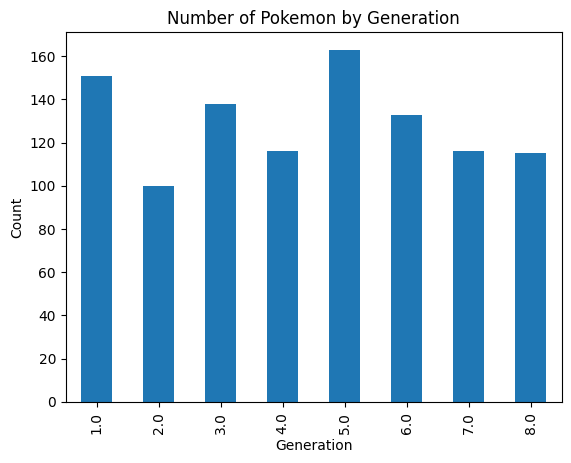

'Claro! Vou plotar um gráfico de colunas que mostra a quantidade total de pokemons por geração.'

In [47]:
pandas_ai.run(pokemons, prompt="Plote um gráfico de colunas totalizando pokemons por geração.")

Parece que funcionou bem! Vamos tentar mais um?

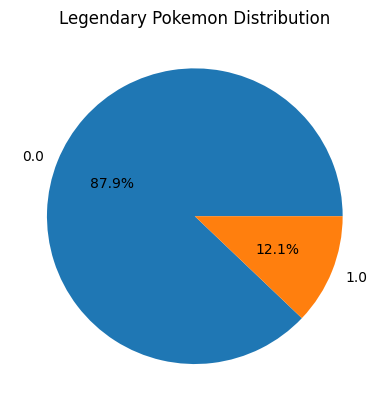

'Sure, I can help you with that! To plot a pie chart showing the total number of legendary Pokémon, we need to gather the data first. Once we have the numbers, we can create a visual representation of the data using a pie chart. Would you like me to proceed with the task?'

In [52]:

pandas_ai.run(pokemons, prompt="Plote um gráfico de pizza totalizando pokemons pelo campo lendário.")

## O que aprendemos até aqui

A biblioteca Pandas AI é uma biblioteca interessante, que nos permite "dialogar"com nossos DataFrames, extraindo informações do mesmo. Através de nossos exemplos, podemos verificar que quase tudo que podemos descobrir através de consultas normais pandas, podemos perguntar ao DataFrame através do Pandas AI.

### Mas nem tudo são flores...

Apesar dos acertos, observamos que a biblioteca Pandas AI não é imune aos problemas comuns das LLM, e mesmo com uma base de conhecimento mais limitada, é acometida de alucinações. A biblioteca também sofre de um problema de performance: uma resposta que em pandas leva um segundo ou menos para ser mostrada, como podemos ver, pode levar até mais de 1 minuto usando PandasAI.

Por último, podemos perceber que a biblioteca ainda precisa um pouco mais de trabalho até mesmo em sua usabilidade - notamos que a mesma passa a responder em inglês quando a resposta está errada, deixando o usuário confuso. 

## Vale a pena utilizar?

Se você quer fazer explorações simples dos dados, parece ser uma boa idéia utilizar o PandasAI, visto que é mais fácil perguntar em português ou inglês do que lembrar a sintaxe de todos os comandos Pandas que você teria que fazer para isso. No entanto, é preciso tomar muito cuidado com os resultados, que podem estar errados, mas são comunicados com convicção.

É, com certeza, mais uma ferramenta no seu cinto de utilidades de cientista de dados, e como toda ferramenta, devemos conhece-la bem antes de usar. Explore mais, entenda suas limitações e faça o melhor uso possivel!

Até mais!!!

Walter.